# StarNet classification
Import StarNet library

In [3]:
from importlib import reload
import StarNet as sn
reload(sn)
reload(sn.train)

training classes imported


<module 'StarNet.train' from 'c:\\Users\\fturi\\Desktop\\GitHub\\StarNet\\StarNet\\StarNet\\train.py'>

## Load data to train the CNN

### Import isochrones from CMD site

In [4]:
df=sn.train.load_data(min_age=5e8,max_age=1e10,age_step=1e8,Z_step=0.005)

dict_keys(['url', 'defaults', 'photsys_file', 'track_parsec', 'dust_sourceM', 'dust_sourceC', 'extinction', 'lpvs', 'imf_file', 'isoc_isagelog', 'isoc_ismetlog'])
Querying http://stev.oapd.inaf.it/cgi-bin/cmd...
Retrieving data...


### Syntetic diagram creation

In [5]:

df_synt=sn.train.generate_synthetic_diagrams(df,1e4)

### Generate immages to train the CNN using syntethic diagrams

In [6]:
immages,labels,axies_limits=sn.train.generate_immages_and_labels(df_synt)

## StarNet.CNN class

### Define CNN class

In [7]:
import StarNet
CNN=StarNet.CNN()

Modello e dati caricati con successo.


### Training

In [22]:
CNN.train_model(immages,labels)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - loss: 3511896.5000 - mae: 784.5407 - val_loss: 2473.3494 - val_mae: 41.1442
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - loss: 1702.4712 - mae: 35.5864 - val_loss: 222.5161 - val_mae: 11.0819
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - loss: 91.1919 - mae: 6.8809 - val_loss: 3.2922 - val_mae: 1.5238
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - loss: 10.8908 - mae: 2.8402 - val_loss: 3.5154 - val_mae: 1.5483
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - loss: 1.8294 - mae: 1.1021 - val_loss: 1.0597 - val_mae: 0.8858
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - loss: 1.0189 - mae: 0.8723 - val_loss: 1.3056 - val_mae: 0.9622
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 450ms/step - loss: 1.1652 - mae: 0.9248 - val_loss: 0.9390 - val_mae: 0.8440
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - loss: 0.8651 - mae: 0.8016 - val_loss: 0.9294 - val_mae: 0.8456
Epoch 9/30
23/23 ━━━━━━━━━━

#### Show trends training

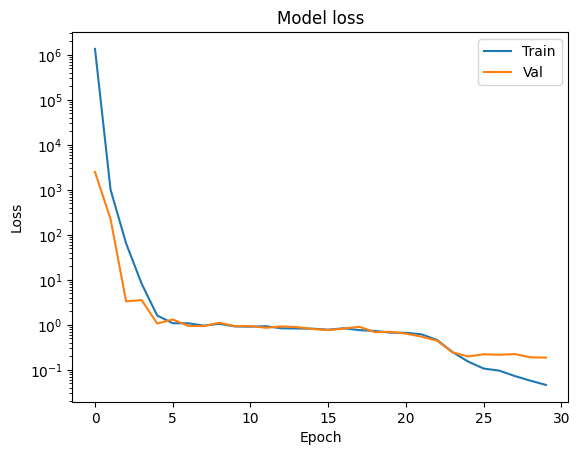

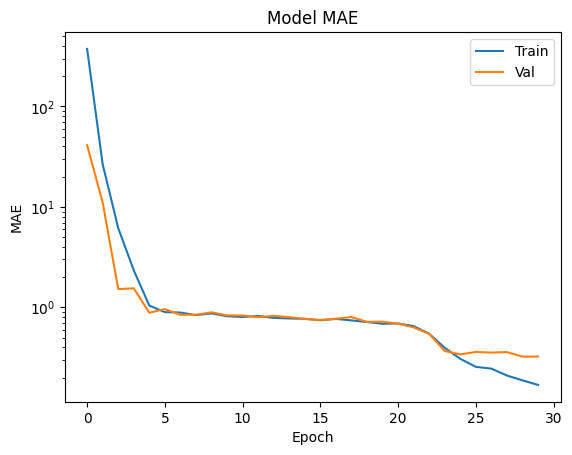

In [23]:
import matplotlib.pyplot as plt
CNN.plot_loss()


plt.show()
CNN.plot_mae()

#### Save Model

In [24]:

#CNN.save_default_model()

Classe salvata correttamente in c:\users\fturi\desktop\github\starnet\starnet\StarNet\default_models\default.pkl


### Load Model

In [8]:
CNN.load_default_model()

Modello e dati caricati con successo.


## Prediction

### Single immage test

In [9]:
df_test=sn.train.load_data(min_age=5e9,max_age=5e9,age_step=0,Z_min=0.022)

dict_keys(['url', 'defaults', 'photsys_file', 'track_parsec', 'dust_sourceM', 'dust_sourceC', 'extinction', 'lpvs', 'imf_file', 'isoc_isagelog', 'isoc_ismetlog'])
Querying http://stev.oapd.inaf.it/cgi-bin/cmd...
Retrieving data...


In [10]:
import numpy as np
key=list(df_test.keys())[0]
imm_test=StarNet.generate_immage(df_test[key])

prediction_test=CNN.predict(imm_test)
print(f"For the age the true value is: {np.power(10,key[0]):.2e} and the prediction is {prediction_test[0][0]:.2e},\n while the metallicity true value is {key[1]:.2e} and its prediction is {prediction_test[0][1]:.2e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
For the age the true value is: 5.00e+09 and the prediction is 3.80e+09,
 while the metallicity true value is 2.20e-02 and its prediction is 1.79e-02


### Over the whole data set

In [30]:
import numpy as np
ages=[]
z=[]
ages_predicted=[]
Zs_predicted=[]

for key in df_synt:
    ages.append(np.power(10,key[0]))
    z.append(key[1])
    
    immage=StarNet.generate_immage(df_synt[key])
    prediction_array=CNN.predict(immage)
    age_predicted=prediction_array[0][0]
    Z_predicted=prediction_array[0][1]
    
    ages_predicted.append(age_predicted)
    Zs_predicted.append(Z_predicted)

ages_predicted=np.array(ages_predicted)
Zs_predicted=np.array(Zs_predicted)

z=np.array(z)
ages=np.array(ages)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

Text(0.5, 1.0, 'Difference betweeen\nestimated ages and real ages')

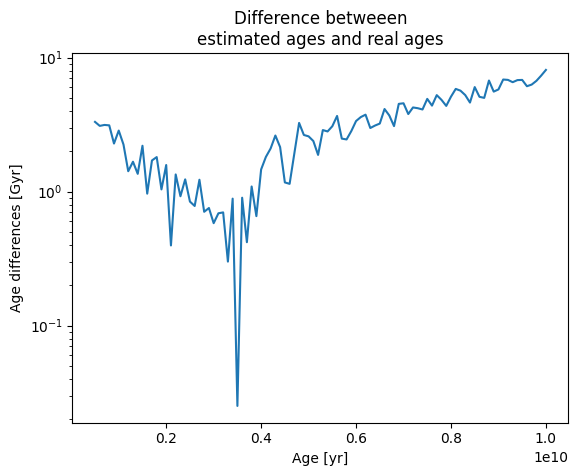

In [78]:
age_diff=np.abs((ages_predicted-ages))
z_diff=np.abs((Zs_predicted-z))
age_diff_perc=age_diff/ages
z_diff_perc=z_diff/z

age_diff=age_diff/1e9
z_diff=z_diff/1e9
plt.plot(ages[::3],age_diff[::3])
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Age differences [Gyr]')
plt.xlabel('Age [yr]')
plt.title('Difference betweeen\nestimated ages and real ages')

#### Shows the graphs

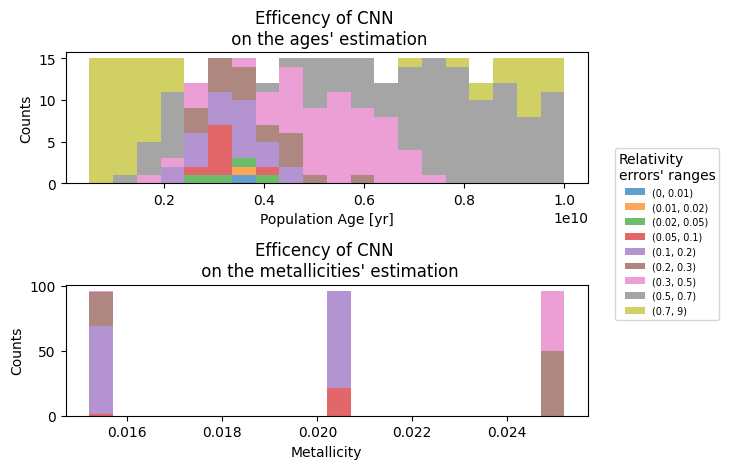

In [65]:
import numpy as np
import matplotlib.pyplot as plt
age_diff_abs=np.abs(age_diff)

# Definire i range per age_diff_abs
edges = [0,0.01,0.02,0.05,0.1,0.2,0.3, 0.5, 0.7, 9]  # Intervalli per age_diff_abs

def plot_stacked_histogram(x,x_diff,edges,ax,n_bins=20):
    # Creare una lista per le età divise per range di age_diff_abs
    data_for_hist = [x[(x_diff > edges[i]) & (x_diff <= edges[i + 1])] for i in range(len(edges) - 1)]

    

    # Creare l'istogramma stackato e catturare i valori
    counts, _, _ = ax.hist(data_for_hist, 
                            bins=n_bins, 
                            density=False, 
                            histtype='bar', 
                            stacked=True, 
                            label=[f'({edges[i]}, {edges[i + 1]})' for i in range(len(edges) - 1)],
                            alpha=0.7)
fig,axs=plt.subplots(2,1)

plot_stacked_histogram(ages,age_diff_perc,edges,axs[0])
plot_stacked_histogram(z,z_diff_perc,edges,axs[1])

# Aggiungere etichette e titolo
axs[0].set_xlabel('Population Age [yr]')
axs[0].set_ylabel('Counts')
axs[0].set_title('Efficency of CNN \n on the ages\' estimation')
#fig.legend(loc='center right',fontsize='small',title='Range errore relativo')  # Mostra la legenda

axs[1].set_xlabel('Metallicity')
axs[1].set_ylabel('Counts')
axs[1].set_title('Efficency of CNN \n on the metallicities\' estimation')
#axs[1].legend(loc='center',fontsize='small',title='Range errore relativo')  # Mostra la legenda

# Creare una legenda comune a destra della figura
fig.legend(handles=axs[0].get_legend_handles_labels()[0],
           labels=axs[0].get_legend_handles_labels()[1],
           loc='center', 
           bbox_to_anchor=(1.05, 0.5),  # Posiziona la legenda a destra
           fontsize='x-small',  # Riduce la dimensione del carattere
           title='Relativity\nerrors\' ranges')

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Lascia spazio a destra per la legenda
plt.show()

#### Syntetich diagrams

[9.53148 9.54407 9.51851]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


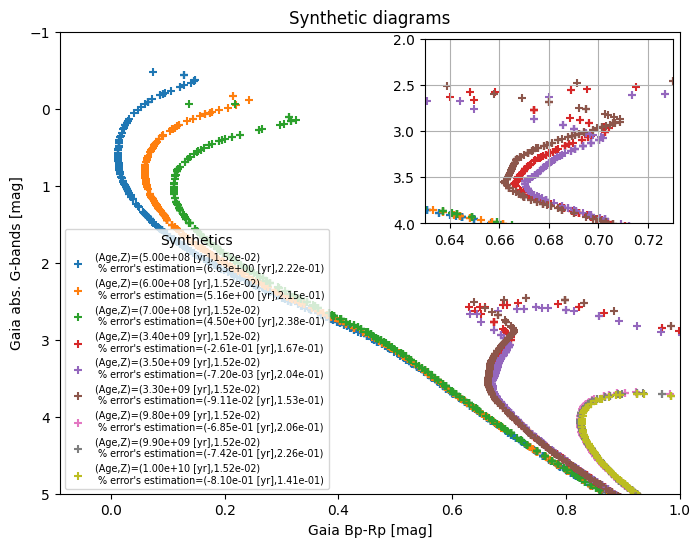

In [86]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#Recupero la lista delle età e delle metallcità dal df
Z_keys=np.array(list(df_synt.keys()))[:,1]

ages_keys=np.array(list(df_synt.keys()))[:,0]

#Trovo la lista di tutte le età
list_of_ages=np.unique(ages_keys)

#Predno le prime 3 età e le ultime 3 età
youth=list_of_ages[:3]
old=list_of_ages[-3:]

#Recupero i valori vicino a 3e9 yr (che è il massimo di efficienza)
a = np.log10(3.4e9)  # Valore di riferimento
array=np.unique(ages_keys)
# Calcola le differenze assolute
differences = np.abs(array - a)

# Ottieni gli indici dei 3 valori più vicini
closest_indices = np.argsort(differences)[:3]
# Recupera i valori corrispondenti
closest_values = array[closest_indices]
print(closest_values)
# Combina i tre array in un unico array
targets = np.concatenate((youth, closest_values, old))

# Trova tutti gli indici in cui si verificano le coppie e concatenali in un'unica lista
all_indices = []
for target in targets:
    indices = np.where((ages_keys == target) & (Z_keys == 0.0152))[0]
    all_indices.extend(indices)  # Aggiungi gli indici trovati alla lista generale
all_indices=np.array(all_indices)


dfs_keys=np.array(list(df_synt.keys()))[all_indices]
dfs_keys=[tuple(key) for key in dfs_keys ]

#estraggo i dfs di mio interesse
dfs_to_plot=[df_synt[key] for key in dfs_keys ]

def plot_df_hist(df,ax,color='Reds'):
    
# Crea un colormap personalizzato
    original_cmap = plt.get_cmap(color)
    inverted_cmap = ListedColormap(original_cmap(np.arange(original_cmap.N))[::-1])
    
    x=np.array(df['G_BPmag'])-np.array(df['G_RPmag'])
    y=np.array(df['Gmag'])
    ax.hist2d(x,y,cmap=inverted_cmap,cmin=1,bins=(200,200))

def plot_df_scatter(df,ax):
    x=np.array(df['G_BPmag'])-np.array(df['G_RPmag'])
    y=np.array(df['Gmag'])
    
    immage=StarNet.generate_immage(df)
    prediction=CNN.predict(immage)
    age=np.power(10, np.array(df['logAge'])[0])
    z=np.array(df['Zini'])[0]
    
    age_predicted=prediction[0][0]
    Z_predicted=prediction[0][1]

    error_age=(age_predicted-age)/age
    error_z=(Z_predicted-z)/z
    label=f"(Age,Z)=({age:.2e} [yr],{z:.2e})\n % error\'s estimation=({error_age:.2e} [yr],{error_z:.2e})"
    ax.scatter(x,y,marker='+',label=label)
    
    
_,axs=plt.subplots(1,1,figsize=(8,6))
# Crea un insetto
axins = inset_axes(axs, width='40%', height='40%', loc='upper right') 

for i,df in enumerate(dfs_to_plot):
    plot_df_scatter(df,axs)
     # posizione dell'inset
    plot_df_scatter(df,axins)
  

axs.invert_yaxis()
#axs.set_xlim(-0.5,1.5)
axs.set_xlim(-0.09,1)

axs.legend(title='Synthetics',loc='lower left',fontsize='x-small')
axs.set_ylim(5,-1)
axs.set_title('Synthetic diagrams')
axs.set_xlabel('Gaia Bp-Rp [mag]')
axs.set_ylabel('Gaia abs. G-bands [mag]')


axins.set_xlim(0.63, 0.73)  # Limiti del riquadro in zoom
axins.set_ylim(4, 2)  # Limiti dell'asse Y
axins.grid()